<a href="https://colab.research.google.com/github/BayooG/visbleman-filtering/blob/master/clean_visible_man_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install opencv-python

In [0]:
!pip install numpy

In [0]:
import os 
import cv2 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount= True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
root_path = '/content/gdrive/My Drive/'

In [0]:
def filter_image(path, clusers = 3):
    k = clusers
    kernel = np.ones((9,9),np.uint8)
    img = cv2.imread(path)
    Z = img.reshape((-1,3))
    # convert to np.float32
    Z = np.float32(Z)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret,label,center=cv2.kmeans(Z,2,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    gray = cv2.cvtColor(res2, cv2.COLOR_BGR2GRAY)
    closing = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel,iterations=1)
    opening = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel,iterations=1)
    _, thresh = cv2.threshold(opening, 120, 255, cv2.THRESH_BINARY)
    contours, _  = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours = sorted(contours, key= cv2.contourArea, reverse=True)[:2]
    cv2.fillPoly(gray, pts =contours, color=(255,255,255))
    # plt.imshow(gray)
    _, thresh = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)
    res = cv2.bitwise_and(img,img,mask = thresh)
    # plt.imshow(res)
    


    path = path.split('/')
    save_path = '/'.join(path[:-3])+ '/vis_process/blacked_'+path[-1]
    croped_path = '/'.join(path[:-3])+ '/vis_process/croped_'+path[-1]
    stat = cv2.imwrite(save_path,res)

    try:
      x,y,w,h = cv2.boundingRect(contours[0])
      new_img1=img[y:y+h,x:x+w]
      cv2.imwrite(croped_path,new_img1)
    except:
      print('error in croping', path)
    if not stat:
      print( path[-1])
    
    

In [0]:
def detect_pictures(directory):
    pics = [directory+item for item in os.listdir(directory)]
    for i,pic in enumerate(pics):
            try:
              filter_image(pic)
            except Exception as e:
              print(e, pic)
            if i % 100 == 0 or i == len(pics) - 1:
              print (i/len(pics)-1)
            

In [0]:
head_path =root_path+'visible man/head/'
head = os.listdir(head_path)

you need to do somthing with the thrashold

/content/gdrive/My Drive/vis_process/a_vm1228.png
True


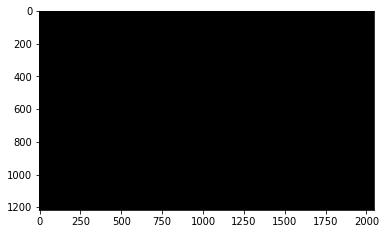

In [0]:
filter_image(head_path+head[200],clusers=2)

In [0]:
img = cv2.imread(head_path+head[0])
plt.imshow(img)

In [0]:
s = cv2.imread('/content/gdrive/My Drive/vis_process/a_vm1228.png')

In [14]:
detect_pictures(head_path)

-1.0
list index out of range /content/gdrive/My Drive/visible man/head/a_vm1262.png
list index out of range /content/gdrive/My Drive/visible man/head/a_vm1227.png
list index out of range /content/gdrive/My Drive/visible man/head/a_vm1248.png
list index out of range /content/gdrive/My Drive/visible man/head/a_vm1189.png
list index out of range /content/gdrive/My Drive/visible man/head/a_vm1255.png
list index out of range /content/gdrive/My Drive/visible man/head/a_vm1222.png
list index out of range /content/gdrive/My Drive/visible man/head/a_vm1236.png
list index out of range /content/gdrive/My Drive/visible man/head/a_vm1253.png
list index out of range /content/gdrive/My Drive/visible man/head/a_vm1191.png
list index out of range /content/gdrive/My Drive/visible man/head/a_vm1198.png
list index out of range /content/gdrive/My Drive/visible man/head/a_vm1184.png
list index out of range /content/gdrive/My Drive/visible man/head/a_vm1157.png
list index out of range /content/gdrive/My Driv

In [0]:
failed = ['/content/gdrive/My Drive/visible man/head/a_vm1262.png',
'/content/gdrive/My Drive/visible man/head/a_vm1227.png',
'/content/gdrive/My Drive/visible man/head/a_vm1248.png',
'/content/gdrive/My Drive/visible man/head/a_vm1189.png',
'/content/gdrive/My Drive/visible man/head/a_vm1255.png',
'/content/gdrive/My Drive/visible man/head/a_vm1222.png',
'/content/gdrive/My Drive/visible man/head/a_vm1236.png',
'/content/gdrive/My Drive/visible man/head/a_vm1253.png',
'/content/gdrive/My Drive/visible man/head/a_vm1191.png',
'/content/gdrive/My Drive/visible man/head/a_vm1198.png',
'/content/gdrive/My Drive/visible man/head/a_vm1184.png',
'/content/gdrive/My Drive/visible man/head/a_vm1157.png',
'/content/gdrive/My Drive/visible man/head/a_vm1225.png',
'/content/gdrive/My Drive/visible man/head/a_vm1152.png',
'/content/gdrive/My Drive/visible man/head/a_vm1185.png',
'/content/gdrive/My Drive/visible man/head/a_vm1178.png',
'/content/gdrive/My Drive/visible man/head/a_vm1223.png',
'/content/gdrive/My Drive/visible man/head/a_vm1221.png',
'/content/gdrive/My Drive/visible man/head/a_vm1204.png',
'/content/gdrive/My Drive/visible man/head/a_vm1186.png',
'/content/gdrive/My Drive/visible man/head/a_vm1246.png',
'/content/gdrive/My Drive/visible man/head/a_vm1153.png',
'/content/gdrive/My Drive/visible man/head/a_vm1177.png',
'/content/gdrive/My Drive/visible man/head/a_vm1224.png',
'/content/gdrive/My Drive/visible man/head/a_vm1181.png',
'/content/gdrive/My Drive/visible man/head/a_vm1238.png',
'/content/gdrive/My Drive/visible man/head/a_vm1352.png',
'/content/gdrive/My Drive/visible man/head/a_vm1229.png',
'/content/gdrive/My Drive/visible man/head/a_vm1231.png',
'/content/gdrive/My Drive/visible man/head/a_vm1256.png',
'/content/gdrive/My Drive/visible man/head/a_vm1230.png',
'/content/gdrive/My Drive/visible man/head/a_vm1254.png',
'/content/gdrive/My Drive/visible man/head/a_vm1180.png',
'/content/gdrive/My Drive/visible man/head/a_vm1192.png',
'/content/gdrive/My Drive/visible man/head/a_vm1154.png',
'/content/gdrive/My Drive/visible man/head/a_vm1242.png',
'/content/gdrive/My Drive/visible man/head/a_vm1240.png',
'/content/gdrive/My Drive/visible man/head/a_vm1226.png',
'/content/gdrive/My Drive/visible man/head/a_vm1007.png',
'/content/gdrive/My Drive/visible man/head/a_vm1244.png',
'/content/gdrive/My Drive/visible man/head/a_vm1228.png',
'/content/gdrive/My Drive/visible man/head/a_vm1259.png',
'/content/gdrive/My Drive/visible man/head/a_vm1179.png',
'/content/gdrive/My Drive/visible man/head/a_vm1239.png',
'/content/gdrive/My Drive/visible man/head/a_vm1151.png',
'/content/gdrive/My Drive/visible man/head/a_vm1245.png',
'/content/gdrive/My Drive/visible man/head/a_vm1251.png',
'/content/gdrive/My Drive/visible man/head/a_vm1249.png',
'/content/gdrive/My Drive/visible man/head/a_vm1250.png',
'/content/gdrive/My Drive/visible man/head/a_vm1247.png',
'/content/gdrive/My Drive/visible man/head/a_vm1237.png',
'/content/gdrive/My Drive/visible man/head/a_vm1260.png',
'/content/gdrive/My Drive/visible man/head/a_vm1258.png',
'/content/gdrive/My Drive/visible man/head/a_vm1252.png',
'/content/gdrive/My Drive/visible man/head/a_vm1190.png',
'/content/gdrive/My Drive/visible man/head/a_vm1241.png',
'/content/gdrive/My Drive/visible man/head/a_vm1235.png',
'/content/gdrive/My Drive/visible man/head/a_vm1156.png',
'/content/gdrive/My Drive/visible man/head/a_vm1234.png',
'/content/gdrive/My Drive/visible man/head/a_vm1233.png',
'/content/gdrive/My Drive/visible man/head/a_vm1194.png',
'/content/gdrive/My Drive/visible man/head/a_vm1155.png',
'/content/gdrive/My Drive/visible man/head/a_vm1232.png',
'/content/gdrive/My Drive/visible man/head/a_vm1203.png',
'/content/gdrive/My Drive/visible man/head/a_vm1257.png',
'/content/gdrive/My Drive/visible man/head/a_vm1183.png',
'/content/gdrive/My Drive/visible man/head/a_vm1243.png',
'/content/gdrive/My Drive/visible man/head/a_vm1010.png',
'/content/gdrive/My Drive/visible man/head/a_vm1182.png']

In [19]:
for pic in failed:
  filter_image(pic)


error in croping ['', 'content', 'gdrive', 'My Drive', 'visible man', 'head', 'a_vm1227.png']
error in croping ['', 'content', 'gdrive', 'My Drive', 'visible man', 'head', 'a_vm1248.png']
error in croping ['', 'content', 'gdrive', 'My Drive', 'visible man', 'head', 'a_vm1189.png']
error in croping ['', 'content', 'gdrive', 'My Drive', 'visible man', 'head', 'a_vm1255.png']
error in croping ['', 'content', 'gdrive', 'My Drive', 'visible man', 'head', 'a_vm1222.png']
error in croping ['', 'content', 'gdrive', 'My Drive', 'visible man', 'head', 'a_vm1236.png']
error in croping ['', 'content', 'gdrive', 'My Drive', 'visible man', 'head', 'a_vm1253.png']
error in croping ['', 'content', 'gdrive', 'My Drive', 'visible man', 'head', 'a_vm1191.png']
error in croping ['', 'content', 'gdrive', 'My Drive', 'visible man', 'head', 'a_vm1198.png']
error in croping ['', 'content', 'gdrive', 'My Drive', 'visible man', 'head', 'a_vm1184.png']
error in croping ['', 'content', 'gdrive', 'My Drive', 'visi